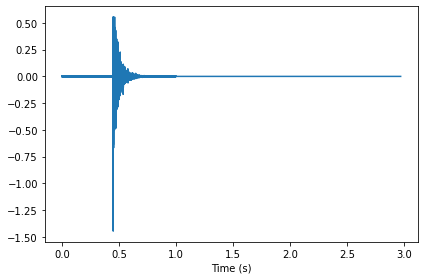

In [33]:
import numpy as np
import matplotlib as plt
from thinkdsp import *

response = read_wave('balloon.wav')

start = 0
duration = 1
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.unbias()
response.zero_pad(2**17)
response.plot()
decorate(xlabel='Time (s)')

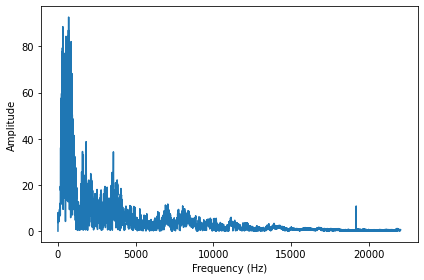

In [34]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

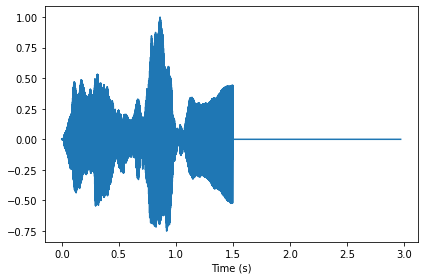

In [38]:
wave = read_wave('violin.wav')

start = 0.12
wave = wave.segment(start=start, duration=duration * 1.5)
wave.shift(-start)

wave.truncate(len(response))
wave.zero_pad(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')

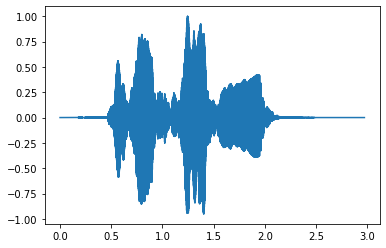

In [39]:
output = (wave.make_spectrum() * transfer).make_wave()
output.normalize()
output.plot()

In [40]:
output.make_audio()

In [41]:
conv = wave.convolve(response)
conv.normalize()
conv.make_audio()

In [42]:
wave.make_audio()